<h1>Labelling Validation Data: PBMC T Panel</h1>

In [2]:
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
pd_init()

In [3]:
# Load experiment
exp = FCSExperiment.objects(experiment_id='PD_T_PDMCs').get()

In [6]:
# Select 10 samples for validation
train_data = ['288-02_pdmc_t', 'Global_Uniform_Sample']
samples = [s for s in exp.list_samples() if s not in train_data]
val_data = np.random.choice(samples, 10, replace=False)

In [7]:
val_data

array(['273-01_pdmc_t', '239-04_pdmc_t', '267-02_pdmc_t', '318-01_pdmc_t',
       '310-01_pdmc_t', '308-03R_pdmc_t', '323-01_pdmc_t',
       '322-01_pdmc_t', '264-02_pdmc_t', '294-03_pdmc_t'], dtype='<U23')

<h2>273-01</h2>

In [4]:
t = Template(exp, '273-01_pdmc_t', include_controls=False)

In [5]:
t.load_template('Major_T_Populations')

True

In [6]:
t.gates.keys()

dict_keys(['boundary', 'CD3_gate', 'live_gate', 'singlets1_gate', 'singlets2_gate', 'gdt_gate', 'mait_gate', 'cd4cd8_gate', 'maitcd4cd8_gate'])

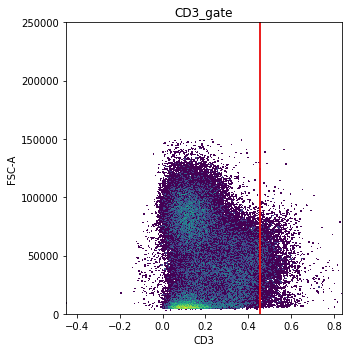

In [7]:
t.plotting.plot_gate('CD3_gate')

In [8]:
t.gates['CD3_gate'].children

['CD3+', 'CD3-']

In [9]:
geoms = {'CD3+': t.populations['CD3+'].geom,
         'CD3-': t.populations['CD3-'].geom}

In [10]:
geoms

{'CD3+': {'method': 'Quantile',
  'threshold': 0.4532089293143109,
  'shape': 'threshold',
  'x': 'CD3',
  'y': None},
 'CD3-': {'method': 'Quantile',
  'threshold': 0.4532089293143109,
  'shape': 'threshold',
  'x': 'CD3',
  'y': None}}

In [11]:
geoms['CD3+']['threshold'] = 0.3
geoms['CD3-']['threshold'] = 0.3

In [12]:
geoms

{'CD3+': {'method': 'Quantile',
  'threshold': 0.3,
  'shape': 'threshold',
  'x': 'CD3',
  'y': None},
 'CD3-': {'method': 'Quantile',
  'threshold': 0.3,
  'shape': 'threshold',
  'x': 'CD3',
  'y': None}}

In [13]:
t.edit_gate('CD3_gate', updated_geom=geoms)

Editing gate: CD3_gate
Updating CD3+
Updating CD3-
The following gates are downstream of CD3_gate and will need to be applied again: ['live_gate', 'singlets1_gate', 'singlets2_gate', 'gdt_gate']
Edit complete!


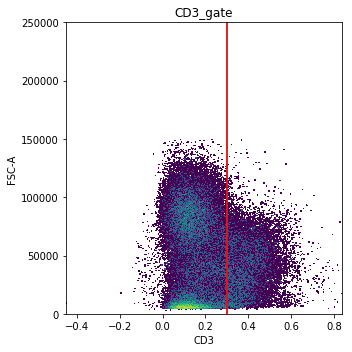

In [15]:
t.plotting.plot_gate('CD3_gate')

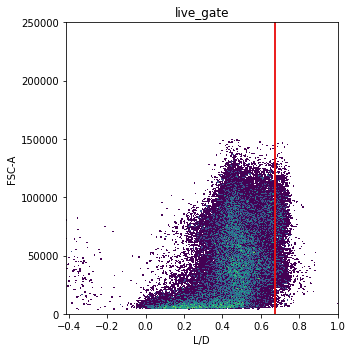

In [16]:
t.apply('live_gate')

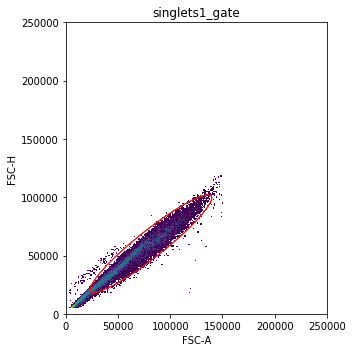

In [17]:
t.apply('singlets1_gate')

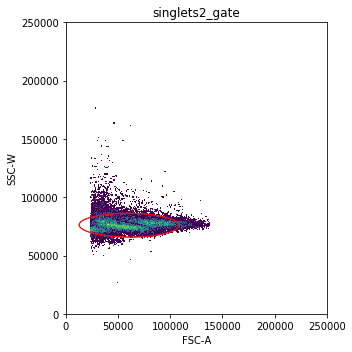

In [18]:
t.apply('singlets2_gate')

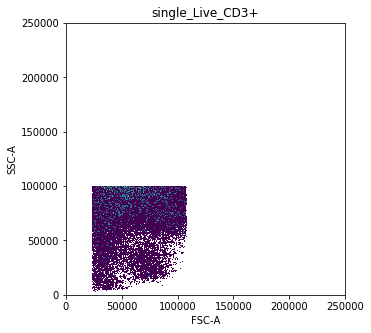

In [23]:
t.plotting.plot_population('single_Live_CD3+', 'FSC-A', 'SSC-A', transforms={'x':None, 'y':None})